In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

In [2]:
from pipeline import MammoPipeline
pipeline = MammoPipeline()

/opt/miniconda/envs/.venv-mammography/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/opt/miniconda/envs/.venv-mammography/lib/python3.11/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/miniconda/envs/.venv-mammography/lib/python3.11/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/miniconda/envs/.venv-mammography/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/opt/miniconda/envs/.venv-mammography/lib/python3.11/site-packages/transformers/utils/generic.py

In [3]:
import dataset
image_annotation_tuples = dataset.load_image_annotation_tuples(
    label_path="vindr/finding_annotations.csv", 
    images_path="vindr_20samples"
)

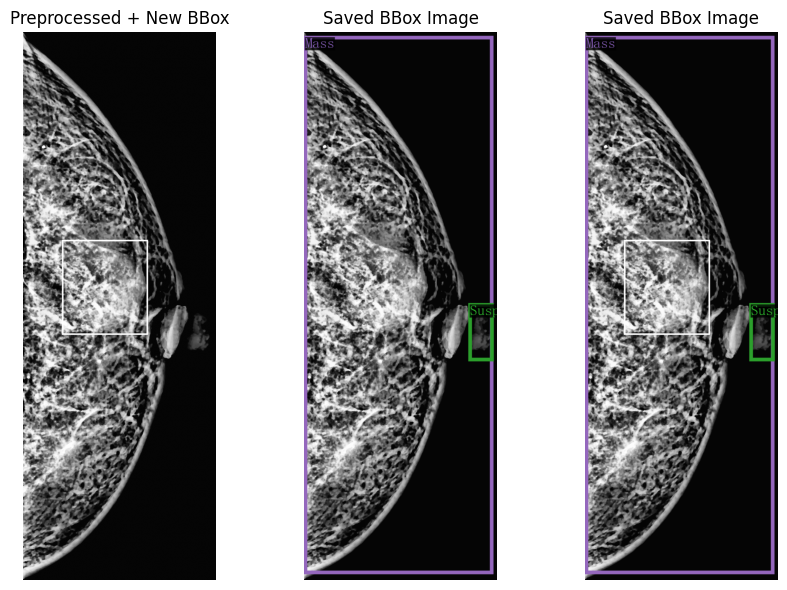

./dataset/vindr_20samples/1785f941abfc8ffc75be624d9e6d5f17/fdef102a89845c81d40fa6c8869fb99a.dicom


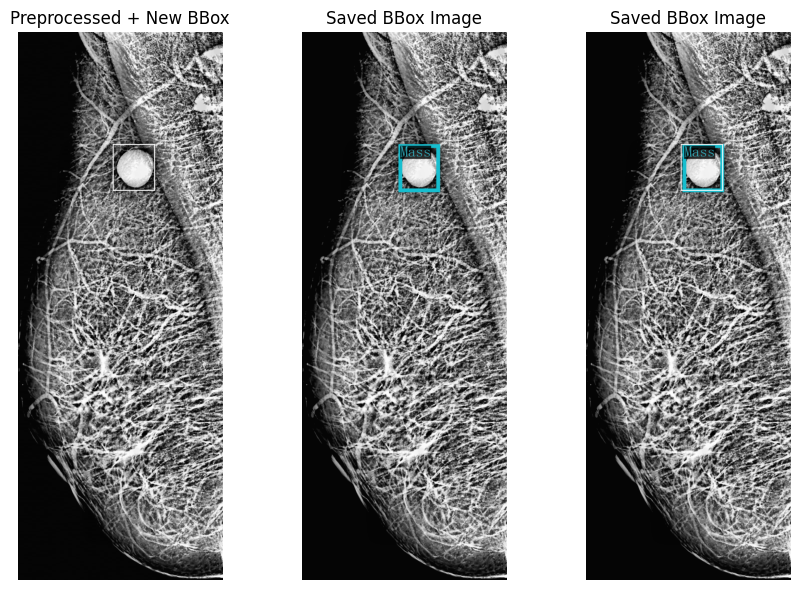

./dataset/vindr_20samples/0f0551f4edb5494b0d8765c23fe421ae/a37e508fc994c1c7a846ec23edfb400f.dicom


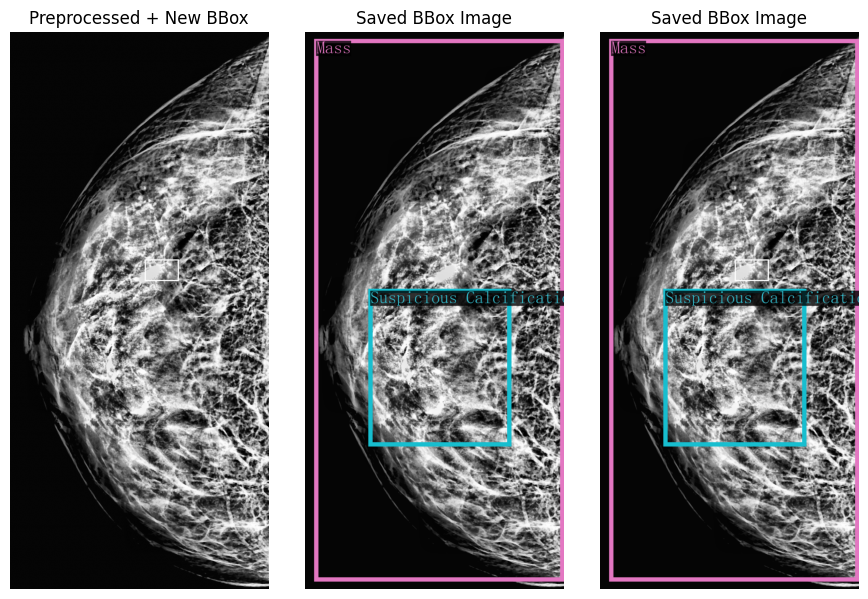

./dataset/vindr_20samples/100d1197bd368737356f1da7fc270ae4/6b1dd04208019290c84add37e109fa79.dicom


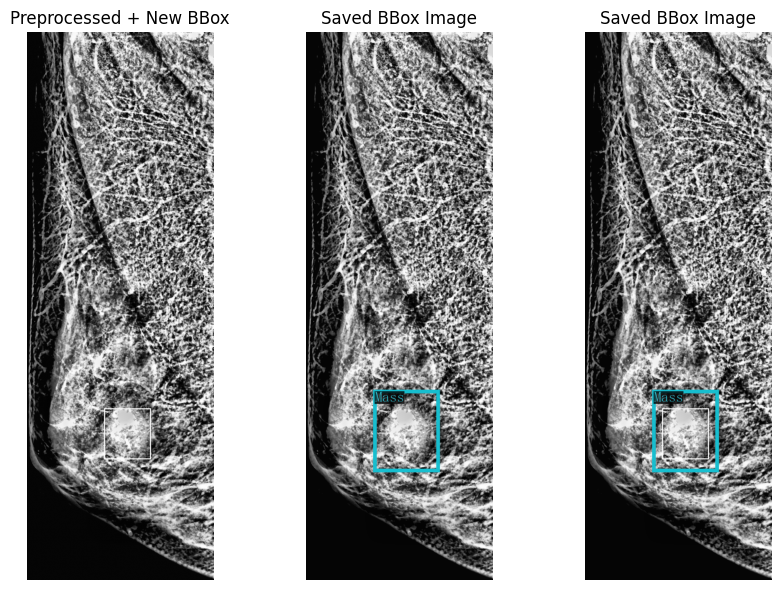

./dataset/vindr_20samples/1450d8b315129d9207bcbb2131eb7d31/35721bd45c2cc3619bc9472b81ec871b.dicom


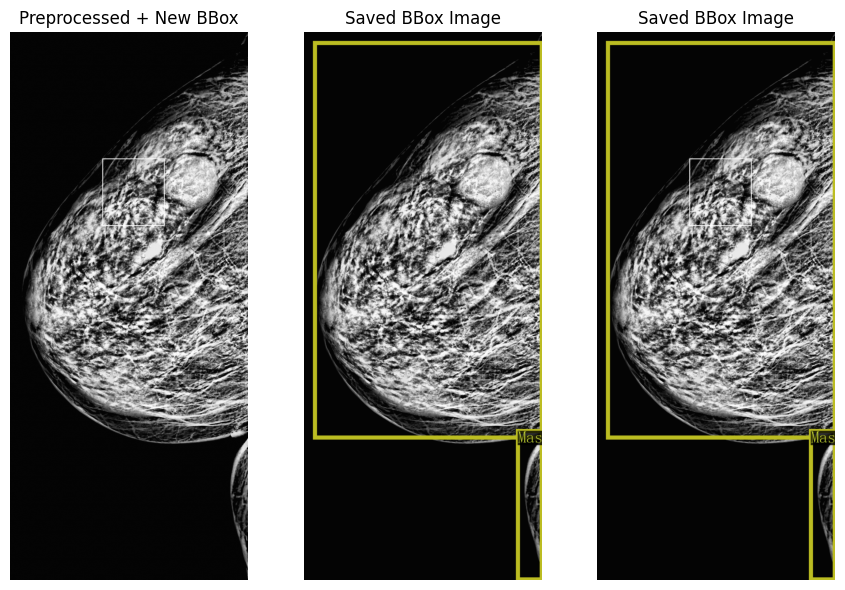

./dataset/vindr_20samples/11589bfe3322139c77653b72a0ea7471/e608d957bf2ecd894c524d0969b05868.dicom


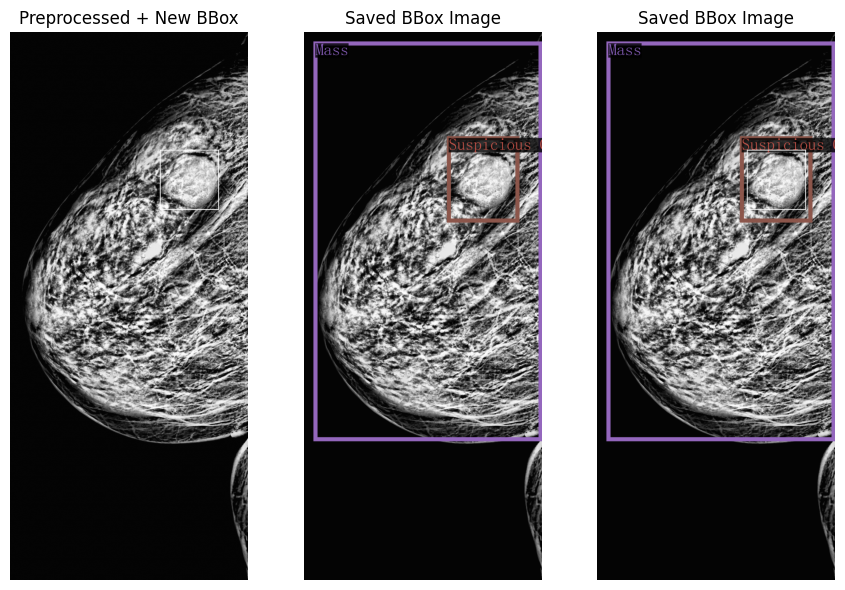

./dataset/vindr_20samples/11589bfe3322139c77653b72a0ea7471/e608d957bf2ecd894c524d0969b05868.dicom


KeyboardInterrupt: 

In [5]:
import os
import preprocess
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

for idx, (img_path, annotation) in enumerate(image_annotation_tuples):
    success, new_annotation = pipeline.run_inference(img_path, annotation)
    if not success:
        continue

    folder = annotation['study_id']
    basename = annotation['image_id']
    img_png_path_pre = os.path.join(pipeline.save_dir, folder, f"{basename}_preprocessed.png")
    img_png_path_bbox = os.path.join(pipeline.save_dir, folder, f"{basename}_bbox.png")

    img1 = np.array(Image.open(img_png_path_pre))
    img1_bbox = preprocess.draw_bbox_grayscale(img1.copy(), new_annotation, color=255, thickness=5)

    img2 = np.array(Image.open(img_png_path_bbox))

    img3 = preprocess.draw_bbox_grayscale(img2.copy(), new_annotation, color=255, thickness=5)

    fig, axs = plt.subplots(1, 3, figsize=(9, 6))
    axs[0].imshow(img1_bbox, cmap='gray')
    axs[0].set_title("Preprocessed + New BBox")
    axs[0].axis("off")

    axs[1].imshow(img2, cmap='gray')
    axs[1].set_title("Saved BBox Image")
    axs[1].axis("off")

    axs[2].imshow(img3, cmap='gray')
    axs[2].set_title("Saved BBox Image")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

    print(img_path)
    # break
